In [51]:
import astropy
from astropy.time import Time,TimezoneInfo
from astropy import units as u
import pandas as pd
from astroplan import Observer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
t = Time('2022-01-1') + arange(365) * u.day
df = pd.DataFrame(dict(utdate=t.to_value('iso','date')))
keck = Observer.at_site("Keck", timezone="US/Hawaii")
sunset = keck.sun_set_time(t,horizon=-12*u.deg,which='next')
sunrise =  keck.sun_rise_time(t,horizon=-12*u.deg, which='next')
nightlength = (sunrise - sunset)

In [174]:
df2 = []
for i in range(1,5):
    df = pd.DataFrame(dict(utdate=t.to_value('iso','date')))
    df['quarter'] = i
    start = sunset + (i-1) / 4.0 * nightlength
    stop = sunset +  i / 4.0 * nightlength  
    df['start_jd'] =  start.jd
    df['start'] = pd.Series(start.to_value('iso','date_hm')).str.slice(start=11,stop=16)
    df['stop'] = pd.Series(stop.to_value('iso','date_hm')).str.slice(start=11,stop=16)
    df2.append(df)

df = pd.concat(df2)
df = df.sort_values(by=['start_jd'])
df = df.reset_index()
df['kpfcc'] = False

df_remain = df.copy()
rs = 0 
nquarters = 365 

# schedule first quarters
dates = df_remain.utdate.drop_duplicates().sample(int(0.25 * nquarters))
df.loc[df.utdate.isin(dates) & (df.quarter==1),'kpfcc'] = True
df_remain = df_remain[~df_remain.utdate.isin(dates)]

# schedule last quarters
dates = df_remain.utdate.drop_duplicates().sample(int(0.25 * nquarters))
df.loc[df.utdate.isin(dates) & (df.quarter==4),'kpfcc'] = True
df_remain = df_remain[~df_remain.utdate.isin(dates)]

# schedule first/last quarters
dates = df_remain.utdate.drop_duplicates().sample(int(0.25 * nquarters))
df.loc[df.utdate.isin(dates) & ((df.quarter==4) | (df.quarter==1)),'kpfcc'] = True
df_remain = df_remain[~df_remain.utdate.isin(dates)]

df.to_csv('kpfcc_schedule_v1.csv')

(array([ 92.,   0.,   0.,   0.,   0., 182.,   0.,   0.,   0.,  91.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

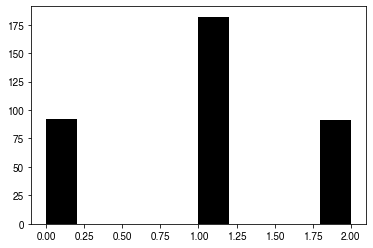

In [175]:
hist(df.groupby('utdate').kpfcc.sum())

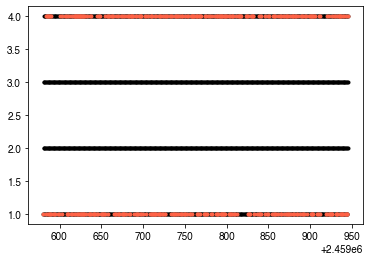

In [176]:
plot(df.start_jd,df.quarter,'.')
plot(df[df.kpfcc].start_jd,df[df.kpfcc].quarter,'.')